<a href="https://colab.research.google.com/github/safira123-pixel/PCVK_Genap_2023/blob/main/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Safira Istifarini

Kelas : TI 3G

Presensi 17

TUGAS PRAKTIKUM MINGGU KE 12

In [14]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import PIL
import io
import html
import time
%matplotlib inline
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode

NOMOR 3

<Figure size 1000x1000 with 0 Axes>

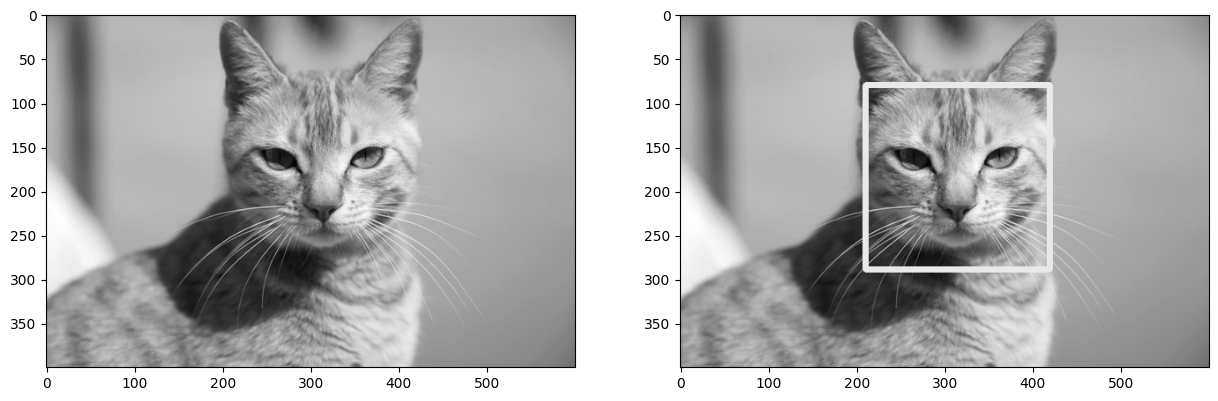

In [24]:
#Nomor 3
cascade_wajah = cv.CascadeClassifier(cv.data.haarcascades + "haarcascade_frontalcatface.xml")

kucing = cv.imread('/content/drive/MyDrive/PCVK/fd/mycat.jpg',0)
kucing_ori = cv.imread('/content/drive/MyDrive/PCVK/fd/mycat.jpg',0)
    
roi_wajah = cascade_wajah.detectMultiScale(kucing_ori)
for (x,y,w,h) in roi_wajah: 
  cv.rectangle(kucing_ori,(x,y),(x+w,y+h),(225,255,225),5) 
plt.figure(figsize = (10,10))

f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(kucing, cmap='gray')
plt.subplot(122),plt.imshow(kucing_ori, cmap='gray')
plt.show()
     

NOMOR 5

In [28]:
def js_to_image(js_reply):
  image_bytes = b64decode(js_reply.split(',')[1])
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  img = cv.imdecode(jpg_as_np, flags=1)

  return img


def bbox_to_bytes(bbox_array):
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  bbox_PIL.save(iobuf, format='png')
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64decode(iobuf.getvalue()), 'utf-8')))
  
  return bbox_to_bytes

In [30]:
face_cascade = cv.CascadeClassifier(cv.samples.findFile(cv.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [31]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality){
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  data = eval_js('takePhoto({})'.format(quality))
  img = js_to_image(data)
  gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
  print(gray.shape)
  faces = face_cascade.detectMultiScale(gray)
  for(x,y,w,h) in faces:
    img = cv.rectangle(img,(x,y),(x+w,y+h),(255, 0, 0),2)

  cv.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


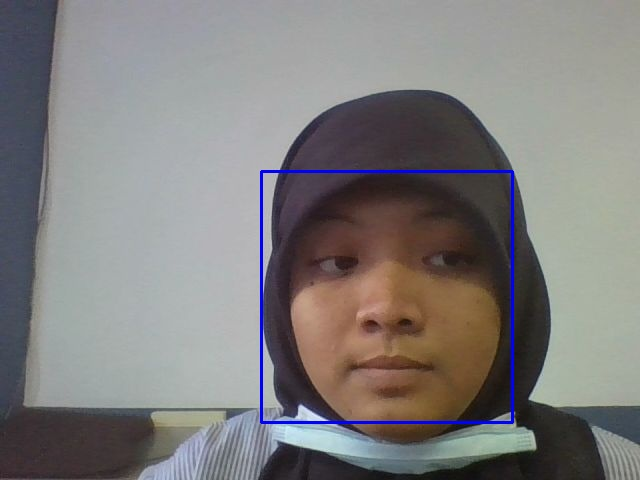

In [32]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  display(Image(filename))
except Exception as err:
  print(str(err))

NOMOR 6

<ipython-input-33-5afec6dd2c40>:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))


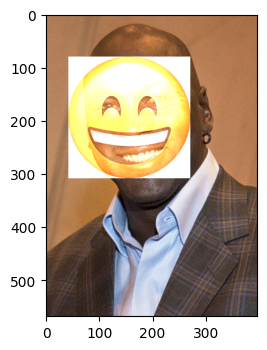

In [33]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/hc/haarcascade_frontalface_alt.xml')
img = cv.imread('/content/drive/MyDrive/PCVK/fd/mjordan.jpg')
smile = cv.imread('/content/drive/MyDrive/PCVK/fd/smile.png', cv.IMREAD_UNCHANGED)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
faces = cascade_wajah.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

for (x, y, w, h) in faces:
    smile_resized = cv.resize(smile, (w, h))
    img[y:y+h, x:x+w] = cv.addWeighted(img[y:y+h, x:x+w], 1, smile_resized[:, :, 0:3], 1, 0)

f, axarr = plt. subplots(figsize=(6,6))
plt.subplot(121), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

NOMOR 7

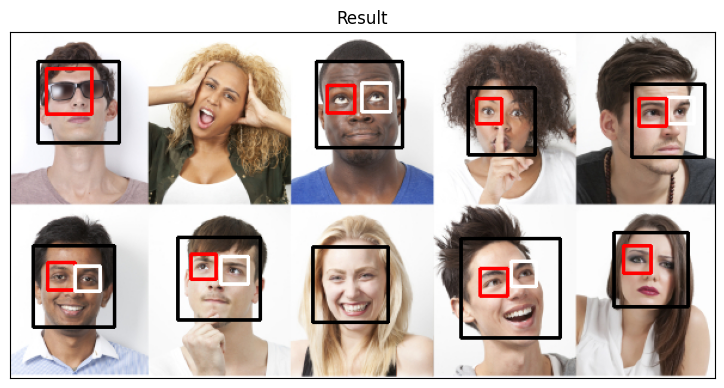

In [34]:
input_image = cv.imread('/content/drive/MyDrive/PCVK/fd/people.jpg')
gray_image = cv.cvtColor(input_image, cv.COLOR_BGR2GRAY)

face_cascade = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/hc/haarcascade_frontalface_alt.xml')
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5)

for (x, y, w, h) in faces:
    cv.rectangle(input_image, (x, y), (x+w, y+h), (0, 0, 0), 2)

    roi_gray = gray_image[y:y+h, x:x+w]
    eye_cascade = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/hc/haarcascade_eye.xml')
    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=5)

    for (ex, ey, ew, eh) in eyes:
        cv.rectangle(input_image, (x+ex, y+ey), (x+ex+ew, y+ey+eh), (0, 0, 255), 2)

        if ex + ew/2 > w/2:
            cv.rectangle(input_image, (x+ex, y+ey), (x+ex+ew, y+ey+eh), (255, 255, 255), 2)

plt.figure(figsize=(20, 20))
plt.subplot(122), plt.imshow(cv.cvtColor(input_image, cv.COLOR_BGR2RGB))
plt.title('Result'), plt.xticks([]), plt.yticks([])
plt.show()